# Assignment 1 Coding part

In [1]:
import numpy as np

Suppose we have data points $x_i \in \mathbb{R}^d$ with $i \in [n]$

The value f(x) of a fully connected feed forward neural network of depth $L$ is a function defined in the following way
$$
z^{l+1} = W^{l}a^{l} + b^{l} \\
a^{l+1} = g(z^{l+1})
$$
where $a^1 = x$ and $g$ is a function that is applied point-wise. With a slight abuse of notation for a vector $v \in \mathbb{R}^{d_l}$ we take $g(v)_{(j)} = g(v_{(j)})$. That is the $j^{th}$ coordinate of $g(v)$ is simply $g$ applied to the $j^{th}$ coordinate of $v$.

Finally, $f(x) = h(z^L)$, where the function $h$ can be anything. We'll talk about that more once we discuss log-loss, but for now, we just take $h$ to be the identity. That is $h(z^L) = z^L$.

# Simple neural network

In this course we will generally take $g$ to be the rectified linear unit, or ReLU.
$$
g(v) = (v)_+
$$
which is just the positive part of $v$. Equivalently,
$$
g(v) = \textrm{max}(v,0)
$$

# Problem 1

In [2]:
np.maximum(np.random.randn(10,1),0)

array([[0.        ],
       [0.        ],
       [2.03108872],
       [0.        ],
       [0.        ],
       [1.38997044],
       [0.67176127],
       [1.50407101],
       [1.36019839],
       [1.89423693]])

In [3]:
n=100
x = np.random.rand(n,1)*10-5
W1 = np.random.randn(5,1)
b1 = np.random.randn(5,1)
W2 = np.random.randn(1,5)
b2 = np.random.randn(1,1)
def g(x):
    ##ReLU
    return np.maximum(x,0)

Problem is to compute the value of the neural net given the above weightings

## Problem 1

In [15]:
def neuralnet(x,W1,W2,b1,b2):
    ##your code goes here
    """
    input:
    x: np.ndarray of shape n x d where n is number of data points and d is dimension of data points
    Note: in this problem d=1
    W1: np.ndarray of shape d2 x d where d2 is the width of layer 2
    W2: np.ndarray of shape d3 x d2 where d3 is the width of the output layer
    Note: in this problem d3=1
    b1: np.ndarray of shape d2 x 1
    b2: np.ndarray of shape d3 x 1 (remember d3=1)
    
    output:
    np.ndarray of shape d3 x n
    """
    d2 = W1.shape[0]
    n = x.shape[0]
    a2 = np.ones((d2,n))
    z2 = W1 @ x.T + b1
    a2 = g(z2)
    z3 = np.ones((1,n))
    z3 = W2 @ a2 + b2
    a3 = g(z3)
    return z3
# print(z3)

In [16]:
assert neuralnet(x,W1,W2,b1,b2).shape == (1,n)

## Plotting the neural net values

In [17]:
import matplotlib.pyplot as plt

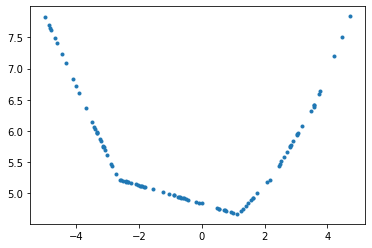

In [14]:
plt.plot(x[:,0],neuralnet(x,W1,W2,b1,b2)[0],'.')

# Basic clustering

Clustering is an important task. For one it allows you to visualize examples of data. You will implement a basic components of clustering below.

In [98]:
n=1000

In [99]:
X=np.random.randn(n,2)+4*(2*((np.random.rand(n,2))>0.5)-1)

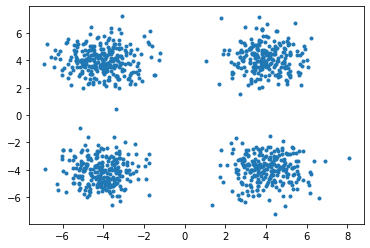

In [100]:
plt.plot(X[:,0],X[:,1],'.')

Obvious clusters above.

One way to think about clustering is to consider a representative of a group (that representative need not belong to that group), and an assignment of actual data points to that representative. One way to consider a good clustering is that in some measure, the data points are close to their representative.

We have data points above. Let's create some representatives. I choose to have $k=4$ representatives.

In [101]:
k=4
mu = np.random.randn(k,2) ##representatives. shape is k x 2

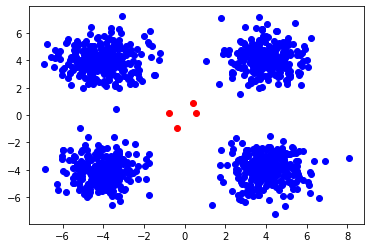

In [102]:
plt.scatter(X[:,0],X[:,1],c='blue')
plt.scatter(mu[:,0],mu[:,1],c='red')

Given the above representatives, let's find the best assignment.

We will create a numpy array `a` that will store the assignments. One reasonable goal is to find the assignments that minimize the squared error. Mathematically

$$
\arg \min_{a_1,a_2,...,a_n} \sum_{i=0}^{n-1} \|x_i - \mu_{a_i} \|_2^2
$$
subject to the constraint that $a_j \in \{0,1,2,...,k-1\}$

Where we take $x_i$ to be the $i^{th}$ data example, or equivalently the $i^{th}$ row of the matrix $X$, which we also denote as $X_{(i,:)}$. Further, we define $\mu_j$ similarly. It is the $j^{th}$ row of the matrix `mu` defined above. Note that there are only $k$ different $\mu_j$ vectors. Thus, when we write $\mu_{a_i}$, then that just means we are considering the $(a_i)^{th}$ row of the matrix `mu` above. This is valid since $a_i \in \{0,1,...,k-1\}$.

We can represent $a$ above as a numpy array.

In [27]:
a = np.random.randint(0,k,size=(n,))

Note that when we take

In [28]:
mu[a]

array([[ 1.40521217,  0.5725346 ],
       [ 1.40521217,  0.5725346 ],
       [-0.5820518 ,  0.43670096],
       ...,
       [-1.3684376 ,  0.51369684],
       [ 1.40521217,  0.5725346 ],
       [ 1.40521217,  0.5725346 ]])

That will pick out element `a[i]` from matrix `mu`

For example,

In [29]:
a[0]=3

In [30]:
mu[a][0]

array([-1.03524561,  1.79037215])

In [31]:
mu[3]

array([-1.03524561,  1.79037215])

## Problem 2

In [105]:
def findassignment(X,mu):
    """
    input:
    X: np.ndarray of shape n,d where n is the number of examples and d is the dimension of the data
    mu: np.ndarray of shape k,d where k is the number of reps and d is the dimension
    
    output:
    a: np.ndarray of shape (n,) where a[i] is assignment of example i
    """
    a=np.zeros(X.shape[0],dtype=int)
    for j in range(X.shape[0]):
        a[j]=0 ##your solution here
        dist = []
        for i in range(mu.shape[0]):
            dist.append(np.linalg.norm(X[j] - mu[i]))
        a[j] = np.argmin(np.array(dist))
    return a

## Visualize assignments
Let's give each assignment a color

In [106]:
colors = np.array(['red','blue','green','black'])

In [107]:
a=findassignment(X,mu)

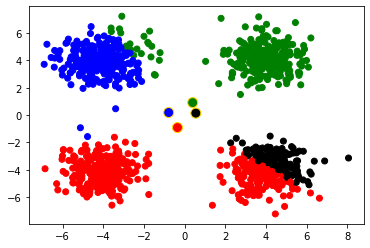

In [108]:
plt.scatter(X[:,0],X[:,1],c=colors[a])
plt.scatter(mu[:,0],mu[:,1],c=colors,s=100,edgecolor='gold')

Probably doesn't look great. But now, we have assignments, so let's find a better representative. Kind of like redistricting. We've redistricted, and now we take a vote the new representative.

Let's stick to minimizizng squared error. Except this time, we have the assignments, so we need to find the representatives.

In [103]:
X.shape

(1000, 2)

## Problem 3

In [122]:
def findrep(X,a,k):
    """
    input:
    X: np.ndarray of shape n,d where n is the number of examples and d is the dimension of the data
    a: np.ndarray of shape (n,) where a[i] is assignment of example i
    k: integer, total number of clusters
    output:
    mu : np.ndarray of shape k,d where k is the number of reps and d is the dimension
    """
    mu=np.random.randn(k,X.shape[1])
    for j in range(k):
        if np.sum(a==j)==0:
            mu[j]=np.random.randn(X.shape[1])
        else:
            mu[j]=X[0] ##your solution here
            mu[j] = np.mean(X[a==j],axis=0)
    return mu

## Update reps and assignments

Find the new reps

In [123]:
mu = findrep(X,a,4)

Find the new assignment

In [124]:
a=findassignment(X,mu)

## Visualize new representatives and assignments again

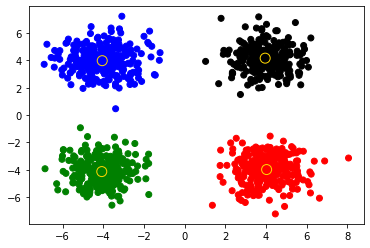

In [125]:
plt.scatter(X[:,0],X[:,1],c=colors[a])
plt.scatter(mu[:,0],mu[:,1],c=colors,s=100,edgecolor='gold')

Should look better. We can actually keep repeating this, let's try repeating it 5 times

In [126]:
for iters in range(5):
    mu = findrep(X,a,4)
    a=findassignment(X,mu)

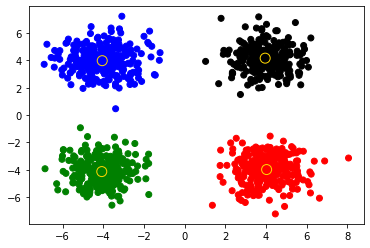

In [127]:
plt.scatter(X[:,0],X[:,1],c=colors[a])
plt.scatter(mu[:,0],mu[:,1],c=colors,s=100,edgecolor='gold')

Should look even better, but sometimes you get stuck in a "bad solution". When that happens you restart the process and try again. Congratulations, you just implemented the k-means algorithm.

You can now create a function called k-means clustering

In [128]:
def kmeans(X,k):
    """
    input:
    X: np.ndarray of shape n,d where n is the number of examples and d is the dimension of the data
    k: total number of clusters
    output:
    mu : np.ndarray of shape k,d where k is the number of reps and d is the dimension
    a: np.ndarray of shape (n,) where a[i] is assignment of example i
    """
    
    """initialize reps with random guesses"""
    mu = np.random.randn(k,X.shape[1])
    for j in range(10):
        a=findassignment(X,mu)
        mu = findrep(X,a,k)
    a=findassignment(X,mu)
    return a,mu

In [129]:
a,mu = kmeans(X,4)

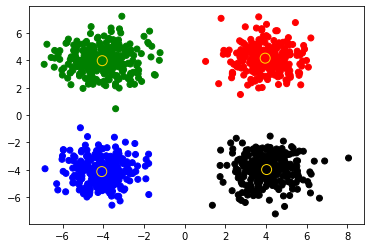

In [130]:
plt.scatter(X[:,0],X[:,1],c=colors[a])
plt.scatter(mu[:,0],mu[:,1],c=colors,s=100,edgecolor='gold')

# Try with a real dataset. MNIST

MNIST is a very common dataset used for testing methods.

In [132]:
# Load MNIST train and test data

leadstring = "C:/Users/Xining/Dropbox/My PC (DESKTOP-Q77OU8J)/Desktop/Campus/First Year/Spring Semester/Applied Data Mining and Machine Learning/Homework/Homework 1/"

## load image data
f=open(leadstring + 'train-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

## load labels
f=open(leadstring + 'train-labels-idx1-ubyte','rb')
g=f.read()
train_labels=np.array(bytearray(g[8:]))
f.close()

numI=60000
dima=28
dimb=28

#create matrix that is 60000 x 28 x 28
train=np.array(bytearray(gimage[16:]))
train.shape=(numI,dima,dimb)

## load image data
f=open(leadstring + 't10k-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

## load labels
f=open(leadstring + 't10k-labels-idx1-ubyte','rb')
g=f.read()
test_labels=np.array(bytearray(g[8:]))
f.close()

numT=10000
dima=28
dimb=28

#create matrix that is 10000 x 28 x 28
test=np.array(bytearray(gimage[16:]))
test.shape=(numT,dima,dimb)

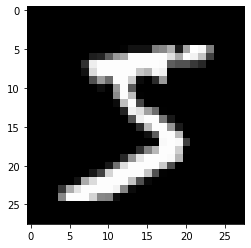

In [150]:
plt.imshow(train[0,:,:],cmap=plt.cm.gray)

Need to reshape images to use them in our code above

In [151]:
ims = train.reshape(train.shape[0],28*28)

In [152]:
a,mu = kmeans(ims,15)

In [153]:
mu.shape

(15, 784)

In [216]:
center=14
##Let's check out one of the representatives (by now maybe it should be clear that these are called centers)

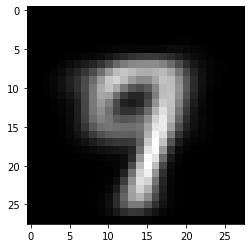

In [217]:
plt.imshow(mu[center].reshape(28,28),cmap=plt.cm.gray)

## Problem 4

Explore with the representatives. Consider the following prompts and write a few sentences for each.

What do the representatives look like?

Find a representative, and identify an element that is associated with it that might not look the same. For instance a representative might look like a $7$, but also has a $1$ associated with it. Why might that be?

In [146]:
from scipy.stats import mode

In [147]:
mostcommon = mode(train_labels[a==center])[0][0]
wrong = train[a==center][train_labels[a==center]!=mostcommon]

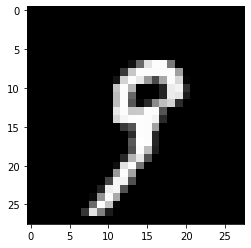

In [218]:
plt.imshow(wrong[1],cmap=plt.cm.gray)

Put your responses here

## What do the representatives look like?

### Solution:
Center 0 and 7 look like 0; center 1, 5 and 11 look like 1; center 2 looks like 2; center 3; 14 and 6 look like 9; center 4 looks like 8; center 8 looks like 5; center 9 and 12 look like 3; center 10 and 11 look like 6;

## Find a representative, and identify an element that is associated with it that might not look the same. For instance a representative might look like a  7 , but also has a  1  associated with it. Why might that be?

### Solution:

Take 9 and 5 for example, they have similar representatives. If the key points of 9 they choose are circle points at the top and several points which are like on the straght line. While 5 can be written as the form which satisfies all representatives that 9 have. Therefore, when the laptop does the recognition, this 5 will be learned as the cluster of 9, since the distance between this 5 and the representatives of cluster 9 is the smallest.